# Animations

### Setup

In [2]:
import sys
sys.path.append("../../")

In [6]:
import numpy as np
import centpy
from example_equations import *
from example_parameters import *

In [4]:
# Setup visualization
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.dpi']  = 60
import matplotlib.pyplot as plt
from matplotlib import animation

j0 = slice(2, -2)

## 1D 

### Burgers (SD3)

We solve the inviscid Burgers' equation 

\begin{equation}
\partial_t u + \partial_x \left( \frac{u^2}{2}\right) = 0,
\end{equation}

on the domain $(x,t)\in([0,2\pi]\times[0,5])$ with initial data

\begin{equation}
u(x,0) = \sin x + \frac{1}{2} \sin\left(\frac{x}{2}\right)\,. 
\end{equation}

and periodic boundary conditions. The solution is computed using 400 cells and CFL number 0.75.

In [7]:
# Setup and solution

# Solver instance
soln_burgers = centpy.Solver1d(Burgers1d(pars_burgers1d))

# Solution
soln_burgers.solve()

<IPython.core.display.Javascript object>


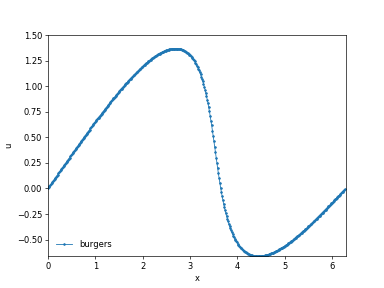

In [8]:
# Animation 

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(soln_burgers.x_init,soln_burgers.x_final), ylim=(np.min(soln_burgers.u_n), np.max(soln_burgers.u_n)*1.1))

line_u, = ax.plot([], [], linewidth=1, marker='o', markersize=2)

plt.xlabel('x')
plt.ylabel('u')
plt.legend(["burgers"], loc=3, frameon=False)
 
# initialization function: plot the background of each frame
def init():
    line_u.set_data([], [])

# animation function.  This is called sequentially
def animate(i):
    line_u.set_data(soln_burgers.x[j0], soln_burgers.u_n[i,j0])
    
# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=soln_burgers.Nt, interval=100, blit=False)
 
plt.show()

### Euler (SD2)

We solve the Euler equations in 1D 

\begin{equation} 
\partial_t 
\begin{bmatrix} \rho \\ \rho v \\ E \end{bmatrix} 
+ 
\partial_x 
\begin{bmatrix} \rho v \\ \rho v^2 +p \\ v (E+p) \end{bmatrix} 
= 0 
\end{equation}

with the equation of state

\begin{equation}
p = (\gamma-1) \left(E-\frac{1}{2} \rho v^2\right), \qquad \gamma=1.4
\end{equation}

on the domain $(x,t)\in([0,1]\times[0,0.1])$ with initial data for a *Sod shock tube*:

\begin{equation}
(\rho, v, p)_{t=0} = 
\begin{cases}
(1,0,1) & \text{if} & 0<x\leq0.5 \\
(0.125, 0, 0.1) & \text{if} & 0.5<x<1
\end{cases}
\end{equation}

and Dirichlet boundary data set by initial data on each boundary. The solution is computed using 400 cells and CFL number 0.75.

In [9]:
# Setup and solution

# Solver instance
soln_euler = centpy.Solver1d(Euler1d(pars_euler1d))

# Solution
soln_euler.solve()

In [15]:
soln_euler.u_n[10,150:250,2]

array([2.5       , 2.5       , 2.5       , 2.5       , 2.5       ,
       2.5       , 2.5       , 2.5       , 2.5       , 2.5       ,
       2.5       , 2.5       , 2.5       , 2.5       , 2.5       ,
       2.5       , 2.5       , 2.5       , 2.49999999, 2.49999996,
       2.49999983, 2.49999931, 2.49999732, 2.49999003, 2.49996457,
       2.49987965, 2.49961031, 2.49880117, 2.49651052, 2.49044009,
       2.47551172, 2.44218591, 2.3801108 , 2.29253197, 2.1933461 ,
       2.09180844, 1.99194888, 1.89549177, 1.8031937 , 1.71535418,
       1.63203504, 1.55316903, 1.47862021, 1.40822363, 1.3418135 ,
       1.27923996, 1.22038964, 1.1651559 , 1.11367277, 1.06615732,
       1.02419304, 0.98890971, 0.96372994, 0.94742126, 0.93979539,
       0.93701206, 0.93696105, 0.93809845, 0.93953001, 0.94168832,
       0.94256646, 0.94132723, 0.93761169, 0.93170681, 0.92456709,
       0.91583816, 0.90506451, 0.89291461, 0.88221027, 0.87520452,
       0.86999287, 0.86828378, 0.8683185 , 0.86828708, 0.86825

<IPython.core.display.Javascript object>


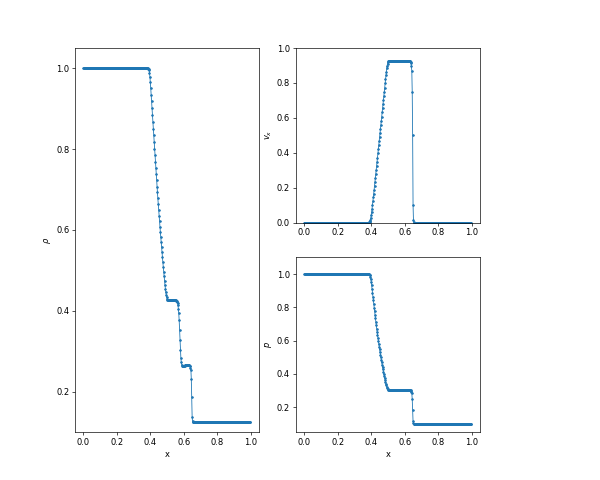

In [10]:
# Animation 
u_n = soln_euler.u_n.copy()
x   = soln_euler.x.copy()
gamma = soln_euler.gamma 
Nt = soln_euler.Nt 

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure(figsize=(10,8))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,4)
#ax = plt.axes(xlim=(x_init,x_final), ylim=(np.min(u_n), np.max(u_n)*1.1))

line_u1, = ax1.plot([], [], linewidth=1, marker='o', markersize=2)
line_u2, = ax2.plot([], [], linewidth=1, marker='o', markersize=2)
line_u3, = ax3.plot([], [], linewidth=1, marker='o', markersize=2)

ax1.set_xlabel('x')
ax3.set_xlabel('x')
ax1.set_ylabel(r'$\rho$')
ax2.set_ylabel(r'$v_x$')
ax3.set_ylabel(r'$p$')
ax1.set_ylim(0.1, 1.05)
ax2.set_ylim(0, 1)
ax3.set_ylim(0.05, 1.1)
#plt.legend(["u0","u1","u2"], loc=3, frameon=False)

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)

# initialization function: plot the background of each frame
def init():
    line_u1.set_data([], [])
    line_u2.set_data([], [])
    line_u3.set_data([], [])

# animation function.  This is called sequentially
def animate(i):
    rho=u_n[i,j0,0]
    u_x = u_n[i,j0,1]/u_n[i,j0,0]
    p = (gamma-1.)*(u_n[i,j0,2]-0.5*rho*u_x**2)
    line_u1.set_data(x[j0], rho)
    line_u2.set_data(x[j0], u_x)
    line_u3.set_data(x[j0], p)
    
# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=Nt, interval=100, blit=False)
 
plt.show()

### MHD (FD2)

We solve the equations of ideal magnetohydrodynamics in 1D 

\begin{equation} 
\partial_t 
\begin{bmatrix} 
\rho \\ \rho v_x \\ \rho v_y \\ \rho v_z \\ B_y \\ B_z \\ E 
\end{bmatrix} 
+ 
\partial_x 
\begin{bmatrix} 
\rho v_x \\ \rho v_x^2 + p^* - B_x^2 \\ \rho v_x v_y - B_x B_y \\
\rho v_x v_z - B_x B_z \\ B_y v_x - B_x v_y \\ B_z v_x - B_x v_z \\
(E+p^*) v_x - B_x (B_x v_x + B_y v_y + B_z v_Z) 
\end{bmatrix} 
= 0 
\end{equation}

where the total pressure is given by 

\begin{equation}
p^* = p + \frac{1}{2} (B_x^2 + B_y^2 + B_z^2)
\end{equation}

with the equation of state

\begin{equation}
p = (\gamma-1) \left(E-\frac{1}{2} \rho (v_x^2+v_y^2+v_z^2) - 
\frac{1}{2}(B_x^2 + B_y^2 + B_z^2)\right), \qquad \gamma=2.0
\end{equation}

The solution is computed on the domain $(x,t)\in([-1,1]\times[0,0.2])$ with initial data for a *Brio-Wu shock tube*:

\begin{equation}
(\rho, v_x, v_y, v_z, B_y, B_z, p)_{t=0} = 
\begin{cases}
(1,0,0,0,1,0,1) & \text{if} & -1<x\leq 0 \\
(0.125, 0, 0, 0, -1, 0, 0.1) & \text{if} & \ \ 0<x<1
\end{cases}
\end{equation}

and Dirichlet boundary data set by initial data on each boundary. The solution is computed using 400 cells and CFL number 0.475.

In [ ]:
# Set up and solution

# Equation
eqn_mhd = MHD1d(pars_mhd1d)

# Solver instance
soln_mhd = centpy.Solver1d(eqn_mhd)

# Solution
soln_mhd.solve()

In [ ]:
# Animation 
 
u_n = soln_mhd1d.u_n.copy()
x   = soln_mhd1d.x.copy()
Nt  = soln_mhd1d.Nt 
pressure = eqn_mhd.pressure
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure(figsize=(12,6))
ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(2,3,2)
ax3=fig.add_subplot(2,3,3)
ax4=fig.add_subplot(2,3,5)
ax5=fig.add_subplot(2,3,6)
#ax = plt.axes(xlim=(x_init,x_final), ylim=(np.min(u_n), np.max(u_n)*1.1))

line_u1, = ax1.plot([], [], linewidth=1, marker='o', markersize=2)
line_u2, = ax2.plot([], [], linewidth=1, marker='o', markersize=2)
line_u3, = ax3.plot([], [], linewidth=1, marker='o', markersize=2)
line_u4, = ax4.plot([], [], linewidth=1, marker='o', markersize=2)
line_u5, = ax5.plot([], [], linewidth=1, marker='o', markersize=2)

ax1.set_xlabel('x')
ax4.set_xlabel('x')
ax5.set_xlabel('x')

ax2.set_xticks([])
ax3.set_xticks([])
ax2.set_yticks([])
ax3.set_yticks([])
ax4.set_yticks([])
ax5.set_yticks([])

ax1.set_ylabel(r'$\rho$', fontsize=12)
ax2.set_ylabel(r'$v_x$', fontsize=12)
ax3.set_ylabel(r'$v_y$', fontsize=12)
ax4.set_ylabel(r'$B_y$', fontsize=12)
ax5.set_ylabel(r'$p$', fontsize=12)

# Primitive variables
rho=u_n[:,j0,0]
v_x = u_n[:,j0,1]/u_n[:,j0,0]
v_y = u_n[:,j0,2]/u_n[:,j0,0]
B_y = u_n[:,j0,4]

ax1.set_xlim(-1, 1)
ax2.set_xlim(-1, 1)
ax3.set_xlim(-1, 1)
ax4.set_xlim(-1, 1)
ax5.set_xlim(-1, 1)
ax1.set_ylim(np.min(rho), np.max(rho))
ax2.set_ylim(np.min(v_x), np.max(v_x))
ax3.set_ylim(np.min(v_y), np.max(v_y))
ax4.set_ylim(np.min(B_y), np.max(B_y))
ax5.set_ylim(0.05, 1.)

#plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)

# initialization function: plot the background of each frame
def init():
    line_u1.set_data([], [])
    line_u2.set_data([], [])
    line_u3.set_data([], [])
    line_u4.set_data([], [])
    line_u5.set_data([], [])

# animation function.  This is called sequentially
def animate(i):
    p = pressure(u_n[i,j0,:])
    line_u1.set_data(x[j0], rho[i])
    line_u2.set_data(x[j0], v_x[i])
    line_u3.set_data(x[j0], v_y[i])
    line_u4.set_data(x[j0], B_y[i])
    line_u5.set_data(x[j0], p)
    
# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=Nt, interval=100, blit=False)
 
plt.show()

## 2D

### Scalar (SD3)

We solve the nonlinear scalar conservation law 

\begin{equation}
\partial_t u + \partial_x \sin u + \frac{1}{3} \partial_y u^3= 0,
\end{equation}

on the domain $(x,y,t)\in([0,2\pi]\times[0,2\pi]\times[0,6])$ with initial data

\begin{equation}
u(x,y,0) = \sin \left(x+\frac{1}{2}\right) \cos(2x+y)
\end{equation}

and periodic boundary conditions. The solution is computed using a 144 $\times$ 144 mesh and CFL number 0.9.

In [ ]:
# Setup and solution

# Solver instance
soln_scalar = centpy.Solver2d(Scalar2d(pars_scalar2d))

# Solution
soln_scalar.solve()

In [ ]:
# Animation
x_init = soln_scalar.x_init
x_final = soln_scalar.x_final
y_init = soln_scalar.y_init
y_final = soln_scalar.y_final
x = soln_scalar.x
y = soln_scalar.y
u_n = soln_scalar.u_n
Nt = soln_scalar.Nt

fig = plt.figure()
ax = plt.axes(xlim=(x_init,x_final), ylim=(y_init, y_final))

ax.set_title("Nonlinear scalar")
ax.set_xlabel("x")
ax.set_ylabel("y")

contours=ax.contour(x[j0], y[j0], u_n[0,j0,j0], 8, colors='black') 
img=ax.imshow(u_n[0,j0,j0], extent=[0, 6.3, 0, 6.3], origin='lower',
           cmap='ocean', alpha=0.5)
#cl=ax.clabel(contours, inline=True, fontsize=8)

fig.colorbar(img)
plt.axis(aspect='image')
def animate(i):
    ax.collections = []
    ax.contour(x[j0], y[j0], u_n[i,j0,j0], 8, colors='black') 
#    cl=ax.clabel(contours, inline=True, fontsize=8)
    img.set_array(u_n[i,j0,j0])
    img.autoscale()
    
# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=Nt, interval=100, blit=False)
 
plt.show()

### Euler (FD2)

We solve the Euler equations in 2D 

\begin{equation} 
\partial_t 
\begin{bmatrix} \rho \\ \rho u_x \\ rho u_y \\ E \end{bmatrix} 
+ 
\partial_x 
\begin{bmatrix} \rho u_x \\ \rho u_x^2 + p \\  \rho u_x u_y \\ (E+p) u_x \end{bmatrix} 
+ 
\partial_y 
\begin{bmatrix} \rho u_y \\ \rho u_y u_x \\  \rho u_y^2 +p \\ (E+p) u_y \end{bmatrix} 
= 0 
\end{equation}

with the equation of state

\begin{equation}
p = (\gamma-1) \left(E-\frac{1}{2} \rho (u_x^2 - u_y^2) \right), \qquad \gamma=1.4
\end{equation}

on the domain $(x,y,t)\in([0,1]\times[0,1]\times[0,0.1])$ with initial data for a *2D Riemann problem*:

\begin{equation}
(\rho, v, p)_{t=0} = 
\begin{cases}
(1,0,1) & \text{if} & 0<x\leq0.5 \\
(0.125, 0, 0.1) & \text{if} & 0.5<x<1
\end{cases}
\end{equation}

and Dirichlet boundary data set by initial data on each boundary. The solution is computed using a 200 $\times$ 200 mesh and CFL number 0.75.

In [ ]:
# Setup and solution

# Solver instance
soln_euler = centpy.Solver2d(Euler2d(pars_euler2d))

# Solution
soln_euler.solve()

In [ ]:
# Animation
x_init = soln_euler.x_init
x_final = soln_euler.x_final
y_init = soln_euler.y_init
y_final = soln_euler.y_final
x = soln_euler.x
y = soln_euler.y
u_n = soln_euler.u_n
Nt = soln_euler.Nt

fig = plt.figure()
ax = plt.axes(xlim=(x_init,x_final), ylim=(y_init, y_final))
#levels=np.arange(-1, 1, 0.1) 

ax.contour(x[1:-1], y[1:-1], u_n[0,1:-1,1:-1,0]) 
def animate(i):
    ax.collections = []
    ax.contour(x[1:-1], y[1:-1], u_n[i,1:-1,1:-1,0])
    
# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=Nt, interval=100, blit=False)
 
plt.show()

### MHD (SD2)

We solve the equations of ideal magnetohydrodynamics in 1D 

\begin{equation} 
\partial_t 
\begin{bmatrix} 
\rho \\ \rho v_x \\ \rho v_y \\ \rho v_z \\ B_x \\ B_y \\ B_z \\ E 
\end{bmatrix} 
+ 
\partial_x 
\begin{bmatrix} 
\rho v_x \\ \rho v_x^2 + p^* - B_x^2 \\ \rho v_x v_y - B_x B_y \\
\rho v_x v_z - B_x B_z \\ 0 \\ B_y v_x - B_x v_y \\ B_z v_x - B_x v_z \\
(E+p^*) v_x - B_x (B_x v_x + B_y v_y + B_z v_Z) 
\end{bmatrix} 
+ 
\partial_y
\begin{bmatrix} 
\rho v_y \\ \rho v_y v_x - B_y B_x \\ \rho v_y^2 + p^* - B_y^2  \\
\rho v_y v_z - B_y B_z \\ B_x v_y - B_y v_x \\ 0 \\ B_z v_y - B_y v_z \\
(E+p^*) v_y - B_y (B_x v_x + B_y v_y + B_z v_Z) 
\end{bmatrix} 
= 0 
\end{equation}

where the total pressure is given by 

\begin{equation}
p^* = p + \frac{1}{2} (B_x^2 + B_y^2 + B_z^2)
\end{equation}

with the equation of state

\begin{equation}
p = (\gamma-1) \left(E-\frac{1}{2} \rho (v_x^2+v_y^2+v_z^2) - 
\frac{1}{2}(B_x^2 + B_y^2 + B_z^2)\right), \qquad \gamma=5/3
\end{equation}

The solution is computed on the domain $(x,y,t)\in([0,2\pi]\times[0,2\pi]\times[0,3])$ with initial data for an *Orszag-Tang vortex system*:

\begin{equation}
(\rho, v_x, v_y, v_z, B_x, B_y, B_z, p)_{t=0} = 
(\gamma^2, -\sin y, \sin x, 0, -\sin y, \sin (2x), 0, \gamma)
\end{equation}

and Dirichlet boundary data set by initial data on each boundary. The solution is computed using a 288$\times$288 mesh and CFL number 0.75.

In [ ]:
# Setup and solution

# Solver instance
soln_mhd = centpy.Solver2d(MHD2d(pars_mhd2d))

# Solution
soln_mhd.solve()

In [ ]:
# Animation

x_init = soln_mhd.x_init
x_final = soln_mhd.x_final
y_init = soln_mhd.y_init
y_final = soln_mhd.y_final
x = soln_mhd.x
y = soln_mhd.y
u_n = soln_mhd.u_n
Nt = soln_mhd.Nt

fig = plt.figure()
ax = plt.axes(xlim=(x_init,x_final), ylim=(y_init, y_final))

ax.set_title("MHD Density")
ax.set_xlabel("x")
ax.set_ylabel("y")

#contours=ax.contour(x[j], y[j], u_n[0,j,j,0], 6, colors='black') 
img=ax.imshow(u_n[0,j0,j0,0], extent=[0, 6.3, 0, 6.3], origin='lower',
           cmap='inferno', alpha=0.5)
#cl=ax.clabel(contours, inline=True, fontsize=8)

fig.colorbar(img)
plt.axis(aspect='image')
def animate(i):
    ax.collections = []
    ax.contour(x[j0], y[j0], u_n[i,j0,j0,0], 20, colors='black',linewidths=0.1) 
    img.set_array(u_n[i,j0,j0,0])
    img.autoscale()
    
# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=Nt, interval=50, blit=False)
 
plt.show()